# Stroke Prediction

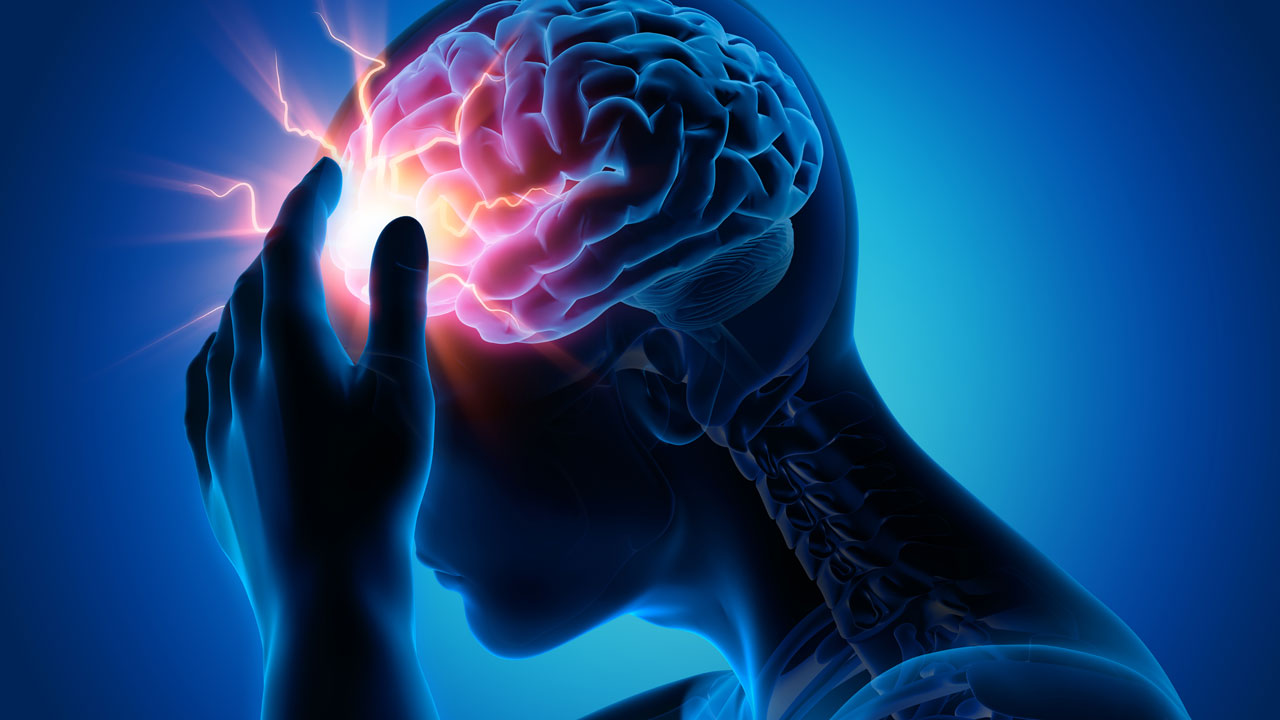

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Data summary

In [4]:
df.shape

(5110, 12)

In [5]:
df.isnull().sum().to_frame()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### Stroke

In [9]:
df.stroke.value_counts(normalize=True).to_frame()

,stroke
0,0.951272
1,0.048728


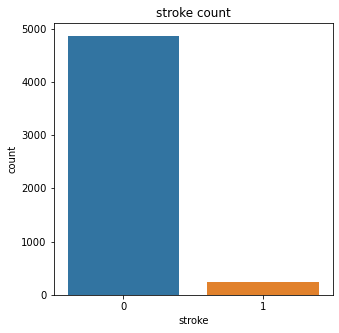

In [10]:
plt.figure(figsize=(5,5))
plt.title('stroke count')
sns.countplot(df.stroke)

### Gender

In [11]:
df.gender.value_counts(normalize=True).to_frame()

,gender
Female,0.585910
Male,0.413894
Other,0.000196


In [12]:
df.groupby('gender').stroke.mean().to_frame()

,stroke
gender,
Female,0.047094
Male,0.051064
Other,0.000000


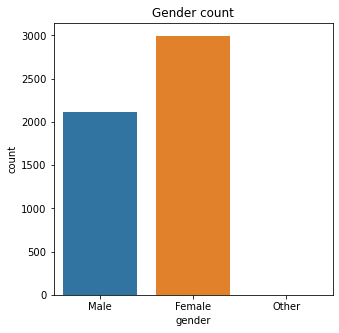

In [13]:
plt.figure(figsize=(5,5))
plt.title('Gender count')
sns.countplot(df['gender'])

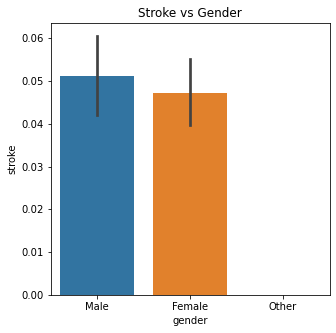

In [14]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Gender')
sns.barplot(df.gender, df.stroke)

### Age

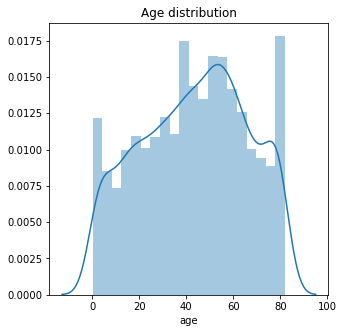

In [15]:
plt.figure(figsize=(5,5))
plt.title('Age distribution')
sns.distplot(df.age)

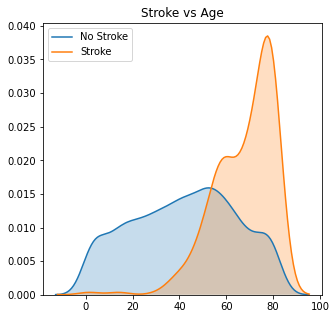

In [16]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Age')
plot = sns.kdeplot(df.age.loc[df.stroke == 0], shade=True, label='No Stroke')
plot = sns.kdeplot(df.age.loc[df.stroke == 1], shade=True, label='Stroke')

### Hypertension

In [17]:
df.hypertension.value_counts(normalize=True).to_frame()

,hypertension
0,0.902544
1,0.097456


In [18]:
df.groupby('hypertension').stroke.mean().to_frame()

,stroke
hypertension,
0,0.039679
1,0.132530


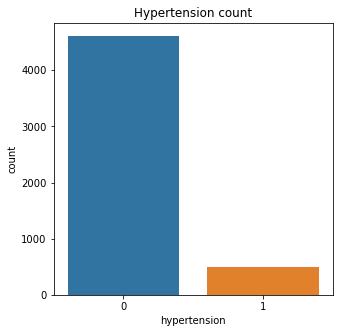

In [19]:
plt.figure(figsize=(5,5))
plt.title('Hypertension count')
sns.countplot(df.hypertension)

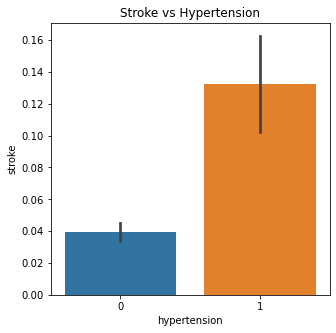

In [20]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Hypertension')
sns.barplot(df.hypertension, df.stroke)

### Heart_disease

In [21]:
df.heart_disease.value_counts(normalize=True).to_frame()

,heart_disease
0,0.945988
1,0.054012


In [22]:
df.groupby(df.heart_disease).stroke.mean().to_frame()

,stroke
heart_disease,
0,0.041787
1,0.170290


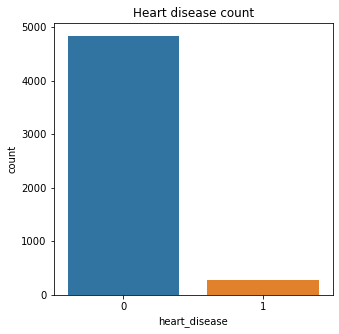

In [23]:
plt.figure(figsize=(5,5))
plt.title('Heart disease count')
sns.countplot(df.heart_disease)

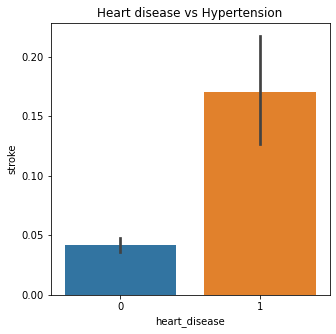

In [24]:
plt.figure(figsize=(5,5))
plt.title('Heart disease vs Hypertension')
sns.barplot(df.heart_disease, df.stroke)

### Ever_married

In [25]:
df.ever_married.value_counts(normalize=True).to_frame()

,ever_married
Yes,0.656164
No,0.343836


In [26]:
df.groupby(df.ever_married).stroke.mean().to_frame()

,stroke
ever_married,
No,0.016505
Yes,0.065613


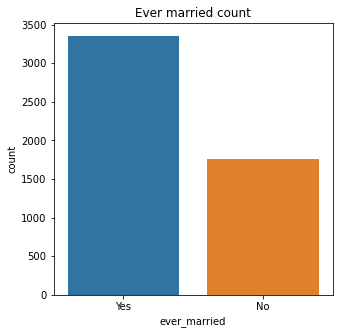

In [27]:
plt.figure(figsize=(5,5))
plt.title('Ever married count')
sns.countplot(df.ever_married)

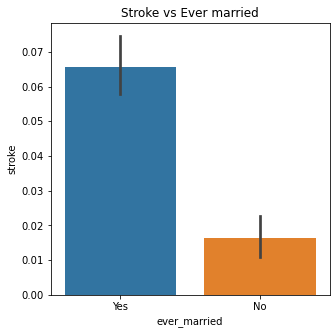

In [28]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Ever married')
sns.barplot(df.ever_married, df.stroke)

### Work type

In [29]:
df.work_type.value_counts(normalize=True).to_frame()

,work_type
Private,0.572407
Self-employed,0.160274
children,0.134442
Govt_job,0.128571
Never_worked,0.004305


In [30]:
df.groupby(df.work_type).stroke.mean().to_frame()

,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


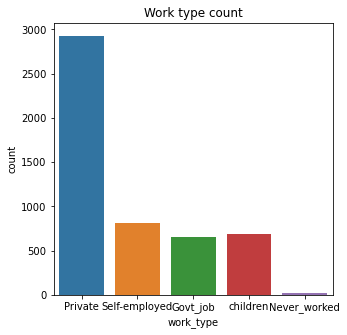

In [31]:
plt.figure(figsize=(5,5))
plt.title('Work type count')
sns.countplot(df.work_type)

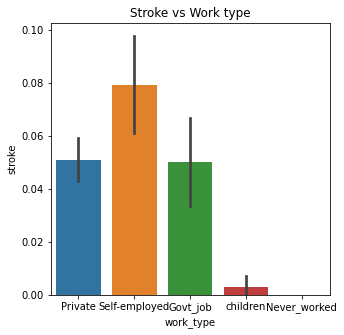

In [32]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Work type')
sns.barplot(df.work_type, df.stroke)

### Residence type

In [33]:
df.Residence_type.value_counts(normalize=True).to_frame()

,Residence_type
Urban,0.508023
Rural,0.491977


In [34]:
df.groupby('Residence_type').stroke.mean().to_frame()

,stroke
Residence_type,
Rural,0.045346
Urban,0.052003


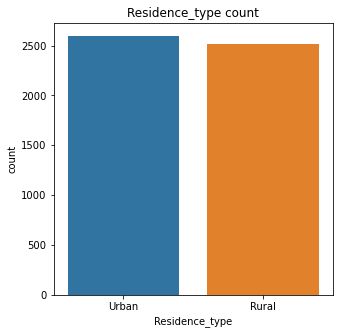

In [35]:
plt.figure(figsize=(5,5))
plt.title('Residence_type count')
sns.countplot(df.Residence_type)

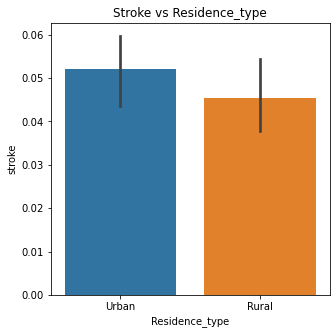

In [36]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Residence_type')
sns.barplot(df.Residence_type, df.stroke)

### Average glucose level

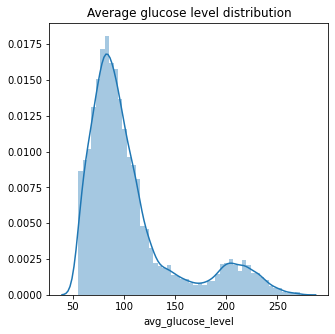

In [37]:
plt.figure(figsize=(5,5))
plt.title('Average glucose level distribution')
sns.distplot(df.avg_glucose_level)

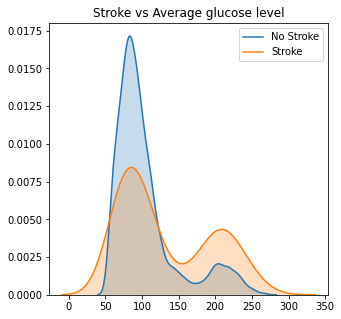

In [38]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Average glucose level')
plot = sns.kdeplot(df.avg_glucose_level.loc[df.stroke == 0], shade=True, label='No Stroke')
plot = sns.kdeplot(df.avg_glucose_level.loc[df.stroke == 1], shade=True, label='Stroke')

### BMI

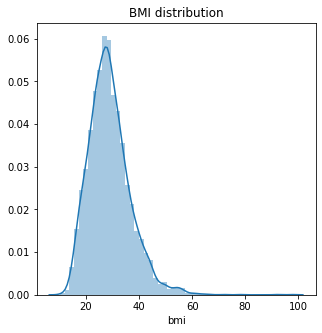

In [39]:
plt.figure(figsize=(5,5))
plt.title('BMI distribution')
sns.distplot(df.bmi)

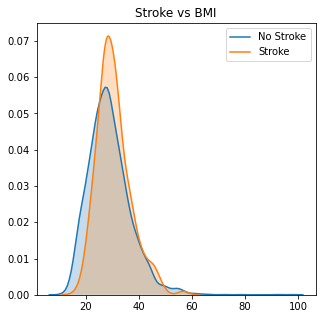

In [40]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs BMI')
plot = sns.kdeplot(df.bmi.loc[df.stroke == 0], shade=True, label='No Stroke')
plot = sns.kdeplot(df.bmi.loc[df.stroke == 1], shade=True, label='Stroke')

### Smoking status

In [41]:
df.smoking_status.value_counts(normalize=True).to_frame()

,smoking_status
never smoked,0.370254
Unknown,0.302153
formerly smoked,0.173190
smokes,0.154403


In [42]:
df.groupby('smoking_status').stroke.mean().to_frame()

,stroke
smoking_status,
Unknown,0.030440
formerly smoked,0.079096
never smoked,0.047569
smokes,0.053232


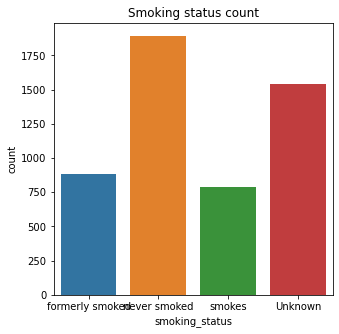

In [43]:
plt.figure(figsize=(5,5))
plt.title('Smoking status count')
sns.countplot(df.smoking_status)

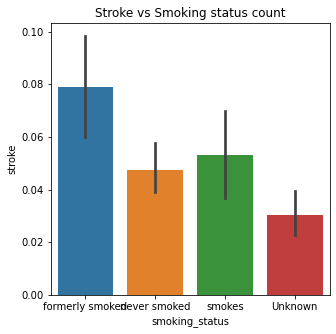

In [44]:
plt.figure(figsize=(5,5))
plt.title('Stroke vs Smoking status count')
sns.barplot(df.smoking_status, df.stroke)

## Feature engineering

### Age

In [45]:
df["age_greater_60"] = df["age"].map(lambda i: 1 if i > 60 else 0)

In [46]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_greater_60
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [47]:
df.age_greater_60.value_counts(normalize=True).to_frame()

,age_greater_60
0,0.744814
1,0.255186


In [48]:
df.groupby(df.age_greater_60).stroke.mean().to_frame()

,stroke
age_greater_60,
0,0.018917
1,0.135736


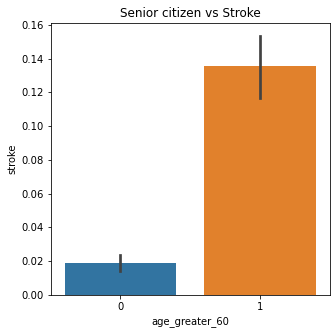

In [49]:
plt.figure(figsize=(5,5))
plt.title('Senior citizen vs Stroke')
sns.barplot(df.age_greater_60, df.stroke)

### Encoding

In [50]:
df = pd.get_dummies(df, columns=['ever_married', 'work_type', 'smoking_status'], drop_first=True)

In [51]:
df = df.rename(columns={"smoking_status_formerly smoked": "smoking_status_formerly_smoked", "smoking_status_never smoked": "smoking_status_never_smoked", "work_type_Self-employed": "work_type_Self_employed"})

In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,age_greater_60,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Urban,228.69,36.6,1,1,1,0,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Rural,202.21,NaN,1,1,1,0,0,1,0,0,1,0
2,31112,Male,80.0,0,1,Rural,105.92,32.5,1,1,1,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Urban,171.23,34.4,1,0,1,0,1,0,0,0,0,1
4,1665,Female,79.0,1,0,Rural,174.12,24.0,1,1,1,0,0,1,0,0,1,0


## Model building

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
features = ['hypertension', 'heart_disease','age_greater_60', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self_employed', 'work_type_children', 'smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes']
X = df[features]
y = df['stroke']

In [55]:
X.head()

,hypertension,heart_disease,age_greater_60,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,0,1,1,1,0,1,0,0,1,0,0
1,0,0,1,1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1
4,1,0,1,1,0,0,1,0,0,1,0


In [56]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

### Logistic regression

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV

In [58]:
clf = LogisticRegressionCV(cv = 10, random_state=0)
clf.fit(X, y)

LogisticRegressionCV(cv=10, random_state=0)

In [59]:
clf.score(X, y)

0.9512720156555773

### Generate pickle file

In [60]:
#import pickle
#file = open('strokePredict.pkl', 'wb')
#pickle.dump(clf, file)